In [2]:
import os
from matplotlib import pyplot as plt
from matplotlib import colors
from astropy.io import fits
from IPython.display import Image
import math
import numpy as np
from astropy.io import ascii
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit


from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 4.2 Dark Frames
## 4.2.1. Combining series of 10 dark frames.

In [ ]:
dark_0c30_frames = []
for i in range(10):
    dfilename = f'dark_0C_30s_visible_.0000000{i}.DARK.FIT'
    dframe = f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/{dfilename}'
    dframe_data = fits.open(dframe)
    dark_0c30_frames.append(dframe_data[0].data)

In [ ]:
masterd_0c30_f= np.mean(dark_0c30_frames, axis=0)

In [ ]:
meandf=np.mean(masterd_0c30_f)
stddf=np.std(masterd_0c30_f)
print(meandf-stddf)
print(meandf+stddf)

873.5625372935551
1200.945565695641


In [ ]:
copy_masterd_0c30_f=np.zeros((1024,1024))
np.copyto(copy_masterd_0c30_f, masterd_0c30_f)

In [ ]:
copy_masterd_0c30_f[copy_masterd_0c30_f > 2000] = np.median(masterd_0c30_f)

In [ ]:
cut_meandf=np.mean(copy_masterd_0c30_f)
cut_stddf=np.std(copy_masterd_0c30_f)

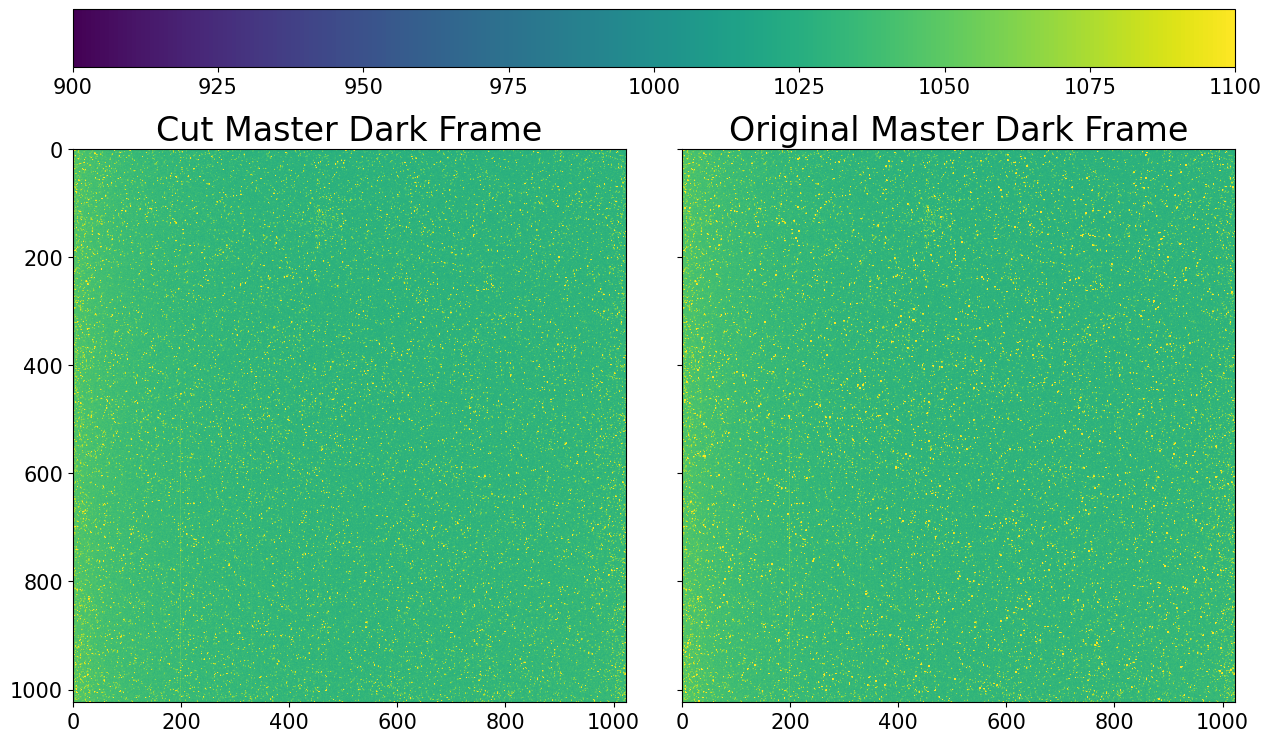

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors # import the colors object from matplotlib

figs, axs= plt.subplots (1, 2, figsize=(15,12), sharex=True, sharey=True)


norm = colors.Normalize(vmin=900, vmax=1100)

cb=axs[0].imshow(copy_masterd_0c30_f,norm=norm)
axs[0].set_title('Cut Master Dark Frame')
#plt.colorbar(cb, ax=axs[0,0])
axs[1].imshow(masterd_0c30_f,vmin=900, vmax=1100)
axs[1].set_title('Original Master Dark Frame')

fig.colorbar(cb, ax=axs, orientation='horizontal', fraction=.75)

figs.subplots_adjust(wspace=0.1, hspace=0.1)

## Each frame is very similar looking but there are slight differences in their warmth. It could be from the fact that the temperature slightly fluctuated around 0C, so those slight temperature changes could have created very faint warmer or colder pixels.

## 4.2.2 Measuring the mean and the standard deviation of the cut dark frames.

In [4]:
d10hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_10s_visible_.00000000.DARK.FIT')
d20hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_20s_visible_.00000000.DARK.FIT')
d30hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_30s_visible_.00000000.DARK.FIT')
d40hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_40s_visible_.00000000.DARK.FIT')
d50hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_50s_visible_.00000000.DARK.FIT')
d60hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_60s_visible_.00000000.DARK.FIT')
d90hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_90s_visible_.00000000.DARK.FIT')
d120hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_120s_visible_.00000000.DARK.FIT')
d10c120hdu= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_10C_120s_visible_.00000000.DARK.FIT')


In [ ]:
df10_data = d10hdu[0].data
df20_data = d20hdu[0].data
df30_data = d30hdu[0].data
df40_data = d40hdu[0].data
df50_data = d50hdu[0].data
df60_data = d60hdu[0].data
df90_data = d90hdu[0].data
df120_data = d120hdu[0].data
df10c120_data = d10c120hdu[0].data


allsec_df= [df10_data, df20_data, df30_data, df40_data, df50_data, df60_data, df90_data, df120_data, df10c120_data]

allsec_dfplot=[df10_data, df20_data, df30_data, df40_data, df50_data, df60_data, df90_data, df120_data]


In [ ]:
##Flattening the 10 dark frames at 30 second exposure

flat_df1=df10_data.flatten() # Changed df_data0 to df10_data
flat_df2=df20_data.flatten() # Changed df_data1 to df20_data
flat_df3=df30_data.flatten() # Changed df_data2 to df30_data
flat_df4=df40_data.flatten() # Changed df_data3 to df40_data
flat_df5=df50_data.flatten() # Changed df_data4 to df50_data
flat_df6=df60_data.flatten() # Changed df_data5 to df60_data
flat_df7=df90_data.flatten() # Changed df_data6 to df90_data
flat_df8=df120_data.flatten() # Changed df_data7 to df120_data
flat_df9=df10c120_data.flatten() # Changed df_data8 to df10c120_data
#flat_df9=df_data9.flatten() # Removed since there doesn't seem to be a corresponding df_data9 variable

In [ ]:
##Flattening the dark frames at different exposures

flat_df10=df10_data.flatten()
flat_df20=df20_data.flatten()
flat_df30=df30_data.flatten()
flat_df40=df40_data.flatten()
flat_df50=df50_data.flatten()
flat_df60=df60_data.flatten()
flat_df90=df90_data.flatten()
flat_df120=df120_data.flatten()
flat_df10c120=df10c120_data.flatten()

allsec_flatdf= [flat_df10, flat_df20, flat_df30, flat_df40, flat_df50, flat_df60, flat_df90, flat_df120, flat_df10c120]


In [ ]:
##Histogram of one dark frame at 30 second exposure

plt.hist(flat_df0, bins=100)
plt.yscale('log')

In [ ]:
##Histogram of each dark frame at different exposures

n_bins=100
fig, axs = plt.subplots(3, 3, figsize=(18,15), sharey=True)

axs[0,0].hist(flat_df10, bins=n_bins)
axs[0,0].set_yscale('log')
axs[0,0].set_title('10 second exposure')
axs[0,1].hist(flat_df20, bins=n_bins)
axs[0,1].set_title('20 second exposure')
axs[0,2].hist(flat_df30, bins=n_bins)
axs[0,2].set_title('30 second exposure')
axs[1,0].hist(flat_df40, bins=n_bins)
axs[1,0].set_title('40 second exposure')
axs[1,1].hist(flat_df50, bins=n_bins)
axs[1,1].set_title('50 second exposure')
axs[1,2].hist(flat_df60, bins=n_bins)
axs[1,2].set_title('60 second exposure')
axs[2,0].hist(flat_df90, bins=n_bins)
axs[2,0].set_title('90 second exposure')
axs[2,1].hist(flat_df120, bins=n_bins)
axs[2,1].set_title('120 second exposure')
axs[2,2].hist(flat_df10c120, bins=n_bins)
axs[2,2].set_title('120 second exposure at 10C')
plt.show()

In [ ]:
#Making a cut on all dark frames

cut_df10=flat_df10[flat_df10<7000]
cut_df20=flat_df20[flat_df20<7000]
cut_df30=flat_df30[flat_df30<7000]
cut_df40=flat_df40[flat_df40<7000]
cut_df50=flat_df50[flat_df50<7000]
cut_df60=flat_df60[flat_df60<7000]
cut_df90=flat_df90[flat_df90<7000]
cut_df120=flat_df120[flat_df120<7000]
cut_df10c120=flat_df10c120[flat_df10c120<7000]


cut2_df10=flat_df10[flat_df10<2000]
cut2_df20=flat_df20[flat_df20<2000]
cut2_df30=flat_df30[flat_df30<2000]
cut2_df40=flat_df40[flat_df40<2000]
cut2_df50=flat_df50[flat_df50<2000]
cut2_df60=flat_df60[flat_df60<2000]
cut2_df90=flat_df90[flat_df90<2000]
cut2_df120=flat_df120[flat_df120<2000]
cut2_df10c120=flat_df10c120[flat_df10c120<2000]

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(18,15), sharey=True)

axs[0,0].hist(cut_df10, bins=n_bins)
axs[0,0].set_yscale('log')
axs[0,0].set_title('10 second exposure')
axs[0,1].hist(cut_df20, bins=n_bins)
axs[0,1].set_title('20 second exposure')
axs[0,2].hist(cut_df30, bins=n_bins)
axs[0,2].set_title('30 second exposure')
axs[1,0].hist(cut_df40, bins=n_bins)
axs[1,0].set_title('40 second exposure')
axs[1,1].hist(cut_df50, bins=n_bins)
axs[1,1].set_title('50 second exposure')
axs[1,2].hist(cut_df60, bins=n_bins)
axs[1,2].set_title('60 second exposure')
axs[2,0].hist(cut_df90, bins=n_bins)
axs[2,0].set_title('90 second exposure')
axs[2,1].hist(cut_df120, bins=n_bins)
axs[2,1].set_title('120 second exposure')
axs[2,2].hist(cut_df10c120, bins=n_bins)
axs[2,2].set_title('120 second exposure at 10C')
plt.show()

In [ ]:
allsec_cutdf=[cut_df10, cut_df20, cut_df30, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120,cut_df10c120]
err_allsec_cutdf=[cut_df10, cut_df20, cut_df30, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120]
allsec_cutdfplot=[cut_df10, cut_df20, cut_df30, cut_df40,cut_df50, cut_df60, cut_df90, cut_df120]
allsec_cut2df=[cut2_df10, cut2_df20, cut2_df30, cut2_df40,cut2_df50, cut2_df60, cut2_df90, cut2_df120,cut2_df10c120]

In [ ]:
for i in range(len(allsec_cutdf)):
    print(np.mean(allsec_cutdf[i]))
    print(np.std(allsec_cutdf[i]))
    print(np.median(allsec_cutdf[i]))

## a

In [ ]:
allsec_cutdfmean=[]
for i in range(len(allsec_cutdfplot)):
    allsec_cutdfmean.append(np.mean(allsec_cutdfplot[i]))
    print(allsec_cutdfmean)


In [ ]:
allsec_dfmean=[]
for i in range(len(allsec_dfplot)):
    allsec_dfmean.append(np.mean(allsec_dfplot[i]))
    print(allsec_dfmean)

In [ ]:
y_err=[]
for i in range(len(err_allsec_cutdf)):
    y_err.append(np.std(err_allsec_cutdf[i]))
    print(np.std(err_allsec_cutdf[i]))
    print(y_err)

In [ ]:
y2_err=[]
for i in range(len(err_allsec_cutdf)):
    y2_err.append(np.sqrt(np.mean(err_allsec_cutdf[i]))/np.sqrt(len(err_allsec_cutdf[i])))
    print(np.std(err_allsec_cutdf[i]))
    print(y2_err)

In [ ]:

for i in range(len(all_cutdf)):
    print(np.sqrt(np.mean(all_cutdf[i]))/np.sqrt(len(all_cutdf[i])))


In [ ]:

for i in range(len(allsec_flatdf)):
    print(np.sqrt(np.mean(allsec_flatdf[i]))/np.sqrt(len(allsec_flatdf[i])))

#4.3. Imaging flat-fields

4.3 1.

In [6]:
flat2s_0= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_2s_visible_.00000000.FLAT.FIT')
flat30_1= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000001.FLAT.FIT')
flat30_2= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000002.FLAT.FIT')
flat30_3= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000003.FLAT.FIT')
flat30_4= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000004.FLAT.FIT')
flat30_5= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000005.FLAT.FIT')
flat30_6= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000006.FLAT.FIT')
flat30_7= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000007.FLAT.FIT')
flat30_8= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000008.FLAT.FIT')
flat30_9= fits.open('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000009.FLAT.FIT')

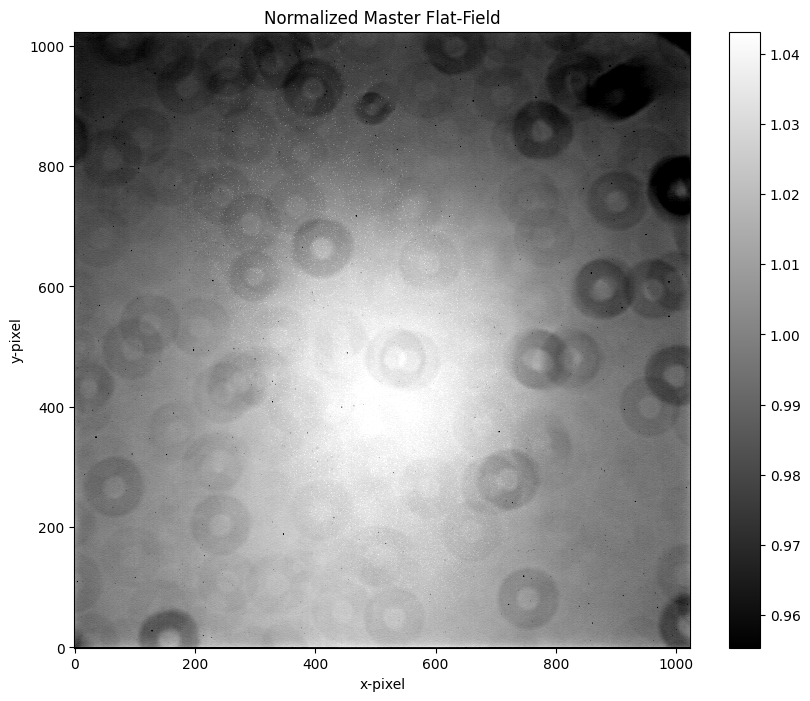

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from google.colab import drive

# Function to open and extract data from FITS files
def get_fits_data(filenames):
    data = []
    for filename in filenames:
        with fits.open(filename) as hdul:
            data.append(hdul[0].data)
    return np.array(data)

# List of flat-field files
flat_files = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_2s_visible_.00000000.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000001.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000002.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000003.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000004.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000005.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000006.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000007.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000008.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/flat_0C_30s_visible_.00000009.FLAT.FIT'
]

# Load flat-field data
flat_data = get_fits_data(flat_files)

# Compute the median flat field
master_flat = np.median(flat_data, axis=0)

# Load dark frames
dark_files = [f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Dark frames/dark_0C_30s_visible_.0000000{i}.DARK.FIT' for i in range(10)]
dark_data = get_fits_data(dark_files)

# Compute the Master Dark
master_dark = np.median(dark_data, axis=0)

# Subtract Master Dark from Master Flat
final_frame = master_flat - master_dark

# Normalize the resulting frame
# Normalization using mean of non-zero pixels
non_zero_pixels = final_frame[final_frame > 0]
normalization_factor = np.mean(non_zero_pixels)
normalized_master_flat = final_frame / normalization_factor

# Step 4: Save the normalized data as a FITS file
output_file_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/Normalized_Master_Flat-Field.FIT'
fits.writeto(output_file_path, normalized_master_flat, overwrite=True)

# Plot the normalized master flat-field
plt.figure(figsize=(10, 8))
plt.imshow(normalized_master_flat, cmap='gray', origin='lower',
           vmin=np.percentile(normalized_master_flat, 1),
           vmax=np.percentile(normalized_master_flat, 99))
plt.colorbar()
plt.title('Normalized Master Flat-Field')
plt.xlabel('x-pixel')
plt.ylabel('y-pixel')
plt.show()

#4.3 2.
After running the code,the normalized_master_flat.FIT file will be in the Google Drive. Now you can open it with DS9. Light regions tend to get 1.02 to 1.05 and dark regions tend to get 0.94 to 0.97.

#4.3 3.
When a star is placed at the center versus the corner of an image, its observed magnitude can change, stars near the edges may appear dimmer.
The light from the star would be spread out over a larger area on the image sensor, resulting in a lower intensity of light detected at any given pixel. \\
$m_1 - m_2$ = -2.5 $log_{10} (\frac{0.94}{1.04})$ \\
$m_1 - m_2$ = 0.1097 \\
$m_1 - m_2$ $\approx$ 0.11

#4.3 4.
Plot a histogram of the counts in your master flat-field. Can you identify any dead pixels?

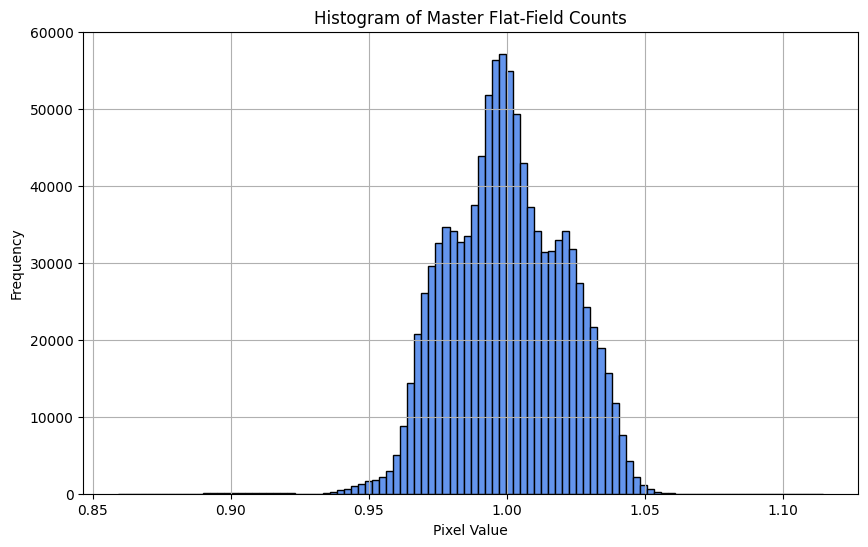

Normalization Factor: 58800.94


In [8]:
# Function to open and extract data from FITS files
def get_fits_data(filenames):
    data = []
    for filename in filenames:
        with fits.open(filename) as hdul:
            data.append(hdul[0].data)
    return np.array(data)

# Load flat-field data
flat_data = get_fits_data(flat_files)

# Compute the median to reduce noise
master_flat = np.median(flat_data, axis=0)

# Normalize the master flat-field
# Normalization factor: mean of the master flat-field image (non-zero pixels)
non_zero_pixels = master_flat[master_flat > 0]
normalization_factor = np.mean(non_zero_pixels)
normalized_master_flat = master_flat / normalization_factor

# Plot a histogram of the counts in the master flat-field
plt.figure(figsize=(10, 6))
plt.hist(normalized_master_flat.flatten(), bins=100, color='cornflowerblue', edgecolor='black')
plt.title('Histogram of Master Flat-Field Counts')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Output normalization factor for reference
print(f"Normalization Factor: {normalization_factor:.2f}")


#Dead pixels typically have values significantly lower than their neighboring pixels,
#or they may be completely zero or near-zero if there is no signal at all.
#Dead pixels typically appear as spikes at very low pixel values in the histogram,
#indicating that there are many pixels with unusually low counts.

#5. If you forgot to take flat-fields on the night of your observations, can you re-take them later?

Yes, you can retake flat-field images after the night of your observations

#4.4. Spectroscopic calibration

#4.4 1.
Opening the the spectroscopic flat-field, the 50µm slit would be the bottom slit as it is the widest and brightest slit.
Reason being that the 50 µm slit will allow more light through, creating a wider spectrum compared to the narrower 25 µm and 35 µm slits.

#4.4 2.

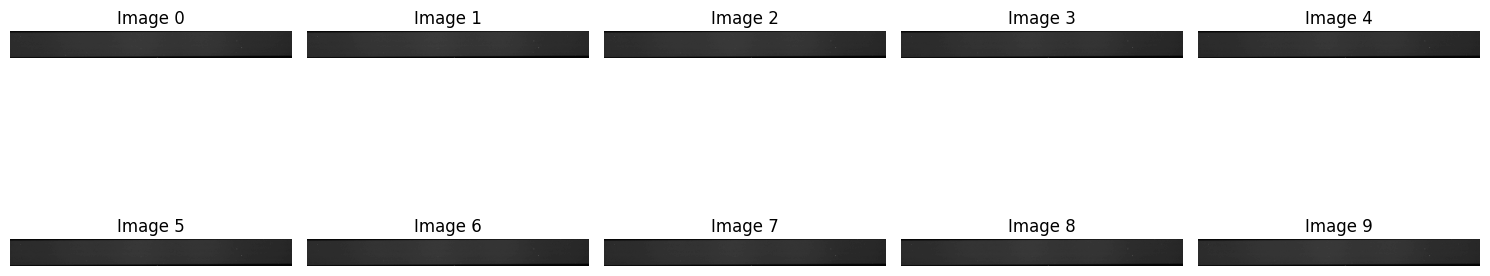

In [9]:
# List of file paths
spec_flats = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000000.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000001.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000002.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000003.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000004.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000005.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000006.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000007.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000008.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/spectroscopy_flat_15s_.00000009.FLAT.FIT'
]

# Define the cropping coordinates
x_min, x_max = 0, 765
y_min, y_max = 30, 102

# Create a subplot grid to display all cropped images
n_files = len(spec_flats)
n_cols = 5
n_rows = (n_files + n_cols - 1) // n_cols  # Compute the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)

# Display each cropped image
for idx, path in enumerate(spec_flats):
    with fits.open(path) as hdul:
        image_data = hdul[0].data

    # Crop the image
    cropped_image = image_data[y_min:y_max, x_min:x_max]

    ax = axes[idx // n_cols, idx % n_cols]
    cax = ax.imshow(cropped_image, cmap='gray', origin='lower')
    ax.set_title(f'Image {idx}')
    ax.axis('off')

# Hide any unused subplots
for j in range(idx + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()

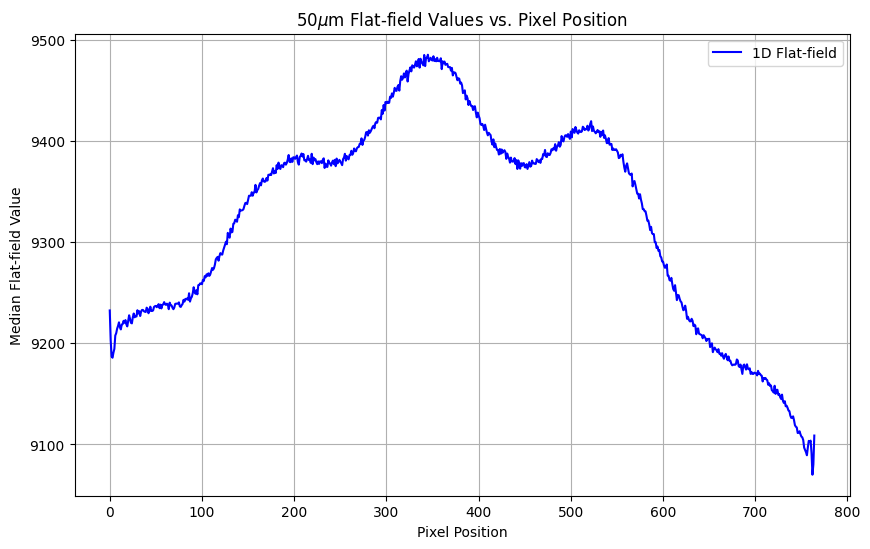

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# List of cropped image file paths
cut_spec_flats = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_00.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_01.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_02.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_03.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_04.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_05.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_06.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_07.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_08.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/cropped_image_09.FIT'
]

# Read in the FITS files and extract image data
data_list = []
for path in cut_spec_flats:
    with fits.open(path) as hdul:
        data_list.append(hdul[0].data)

# Convert list to a 3D numpy array
data_cube = np.array(data_list)

# Collapse the 3D data to 2D by taking the median across the first axis
flat_field_2d = np.median(data_cube, axis=0)

# Collapse the 2D flat-field data to 1D by taking the median of each column
median_flat_field = np.median(flat_field_2d, axis=0)

# Create an array of pixel positions (assuming the first dimension is along the dispersion axis)
pixel_positions = np.arange(len(median_flat_field))

# Plot the 1D flat-field values
plt.figure(figsize=(10, 6))
plt.plot(pixel_positions, median_flat_field, label='1D Flat-field', color='blue')
plt.xlabel('Pixel Position')
plt.ylabel('Median Flat-field Value')
plt.title('50$\mu$m Flat-field Values vs. Pixel Position')
plt.legend()
plt.grid(True)
plt.show()

#4.4 3.

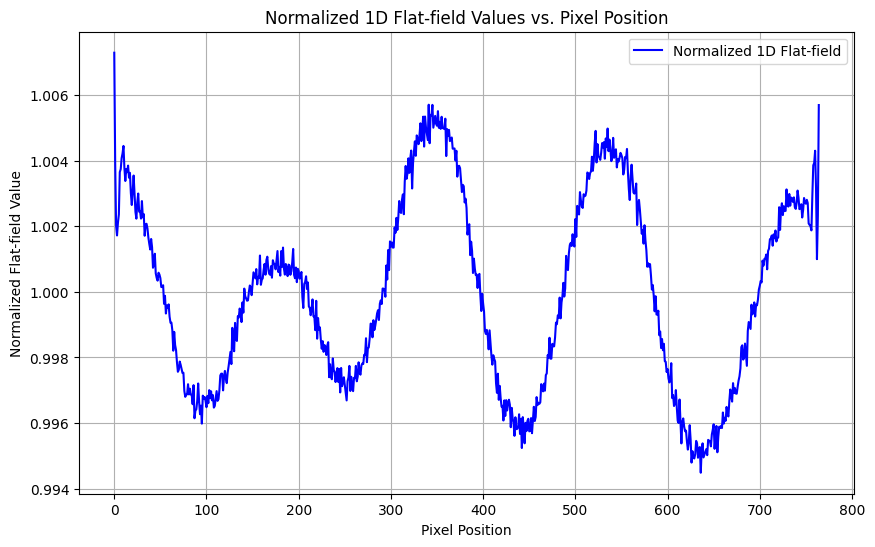

In [11]:
# Define a polynomial function for fitting
def poly_fit(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Read in the FITS files and extract image data
data_list = []
for path in cut_spec_flats:
    with fits.open(path) as hdul:
        data_list.append(hdul[0].data)

# Convert list to a 3D numpy array
data_cube = np.array(data_list)

# Collapse the 3D data to 2D by taking the median across the first axis
flat_field_2d = np.median(data_cube, axis=0)

# Collapse the 2D flat-field data to 1D by taking the median of each column
median_flat_field = np.median(flat_field_2d, axis=0)

# Create an array of pixel positions (assuming the first dimension is along the dispersion axis)
pixel_positions = np.arange(len(median_flat_field))

# Fit a low-order polynomial to the 1D flat-field spectrum
degree = 3  # You can change this degree if needed
coeffs, _ = curve_fit(lambda x, *coeffs: poly_fit(x, *coeffs), pixel_positions, median_flat_field, p0=np.ones(degree + 1))

# Generate the polynomial fit
poly_fit_values = poly_fit(pixel_positions, *coeffs)

# Normalize the 1D flat-field by dividing by the polynomial fit
normalized_flat_field = median_flat_field / poly_fit_values

# Normalize the 2D flat-field image
normalized_flat_field_2d = flat_field_2d / poly_fit_values

# Define the path for saving the normalized flat-field FITS file
#normalized_fits_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_flats/Normalized_1D_flat_field_spec.FIT'

# Save the normalized 2D flat-field to a FITS file
#hdu = fits.PrimaryHDU(normalized_flat_field_2d)
#hdul = fits.HDUList([hdu])
#hdul.writeto(normalized_fits_path, overwrite=True)

#print(f'Normalized flat-field saved to {normalized_fits_path}')


# Plot the normalized 1D flat-field
plt.figure(figsize=(10, 6))
plt.plot(pixel_positions, normalized_flat_field, label='Normalized 1D Flat-field', color='blue')
plt.xlabel('Pixel Position')
plt.ylabel('Normalized Flat-field Value')
plt.title('Normalized 1D Flat-field Values vs. Pixel Position')
plt.legend()
plt.grid(True)
plt.show()

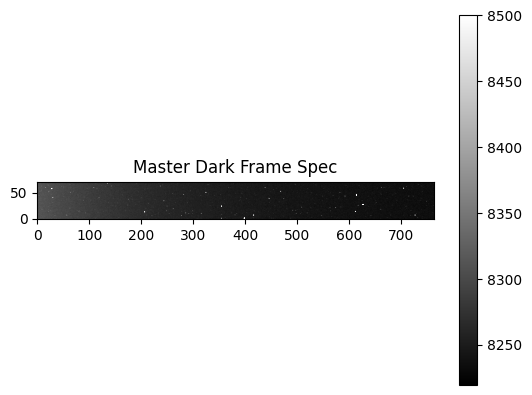

In [12]:
spec_darks = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000000.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000001.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000002.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000003.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000004.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000005.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000006.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000007.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000008.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/spectroscopy_dark_15s_.00000009.DARK.FIT'
]

# Initialize a list to hold the data
dark_frames = []

# Define the cropping coordinates
x_min, x_max = 0, 765
y_min, y_max = 30, 102

# Load and crop each dark frame
for frame in spec_darks:
    with fits.open(frame) as hdul:
        # Assuming the image data is in the first HDU
        dark_frame = hdul[0].data
        # Crop the frame
        cropped_frame = dark_frame[y_min:y_max, x_min:x_max]
        dark_frames.append(cropped_frame)

# Convert to a numpy array and calculate the median across the stack
median_dark = np.median(dark_frames, axis=0)

# Create a new FITS file to save the master dark frame
hdu = fits.PrimaryHDU(median_dark)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/master_dark_frame_spec.FIT', overwrite=True)

# Optional: Display the median dark frame
plt.imshow(median_dark, cmap='gray', origin='lower', vmax = 8500)
plt.colorbar()
plt.title('Master Dark Frame Spec')
plt.show()

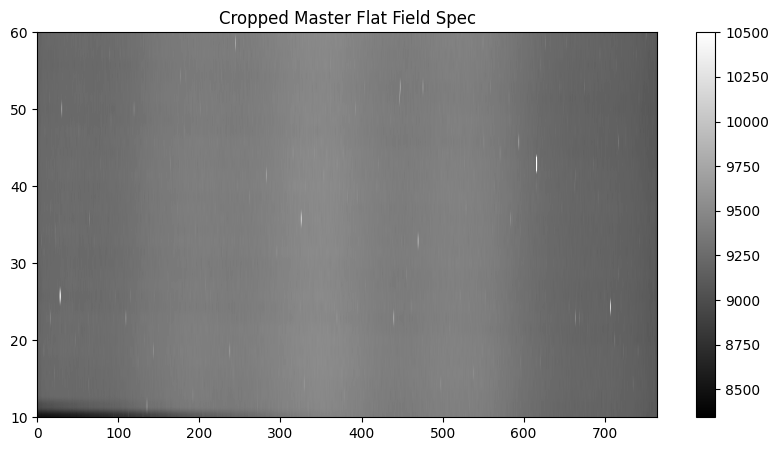

In [13]:
# Define a low-order polynomial function
def poly_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Initialize a list to store flat-fields
flats = []

# Define the cropping coordinates (Difference from the above code!!!)
x_min, x_max = 0, 765
y_min, y_max = 30, 102

for file_path in cut_spec_flats:
    # Read the FITS file
    with fits.open(file_path) as hdul:
        flat_data = hdul[0].data  # Assuming data is in the first HDU

    # Crop the flat data
    flat_data_cropped = flat_data[y_min:y_max, x_min:x_max]

    # Average over the vertical axis to create a 1D spectrum
    flat_1d = np.mean(flat_data_cropped, axis=0)

    # Fit a low-order polynomial (e.g., 3rd degree)
    x = np.arange(len(flat_1d))
    popt, _ = curve_fit(poly_func, x, flat_1d, p0=np.ones(4))  # p0 is initial guess for coefficients

    # Create fitted polynomial
    fit_curve = poly_func(x, *popt)

    # Create flat-field without normalization
    flat_field = flat_data_cropped  # Keep the cropped flat field
    flats.append(flat_field)

# Average the flat-fields to create the master flat field
master_flat_field = np.mean(flats, axis=0)

# Visualize the master flat field
plt.figure(figsize=(10, 5))
plt.title('Cropped Master Flat Field Spec')
plt.imshow(master_flat_field, aspect='auto', cmap='gray', extent=[0, master_flat_field.shape[1], 5, 65], vmax = 10500)
plt.colorbar()
plt.xlim(0, master_flat_field.shape[1])  # Adjust x-axis limits if necessary
plt.ylim(10, 60)  # Set y-axis limits to focus on the grey region

# Adjust the aspect ratio to ensure the region is shown more prominently
plt.gca().set_aspect('auto', adjustable='box')

plt.show()

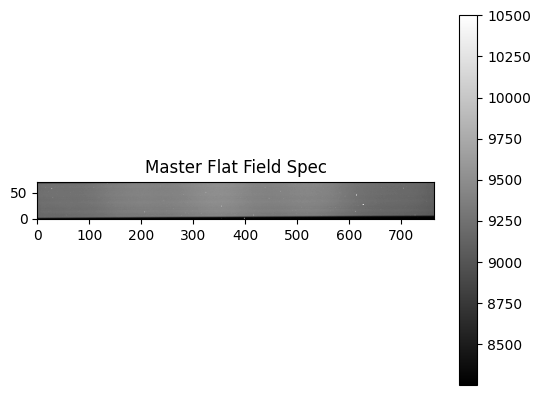

In [14]:
# Initialize a list to hold the data
flat_frames = []

# Define the cropping coordinates
x_min, x_max = 0, 765
y_min, y_max = 30, 102

# Load and crop each flat frame
for frame in spec_flats:
    with fits.open(frame) as hdul:
        # Assuming the image data is in the first HDU
        flat_frame = hdul[0].data
        # Crop the frame
        cropped_frame = flat_frame[y_min:y_max, x_min:x_max]
        flat_frames.append(cropped_frame)

# Convert to a numpy array and calculate the median across the stack
median_flat = np.median(flat_frames, axis=0)

# Create a new FITS file to save the master flat field
hdu = fits.PrimaryHDU(median_flat)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/master_flat_field_spec.FIT', overwrite=True)

# Optional: Display the median flat field
plt.imshow(median_flat, cmap='gray', origin='lower', vmax= 10500)
plt.colorbar()
plt.title('Master Flat Field Spec')
plt.show()

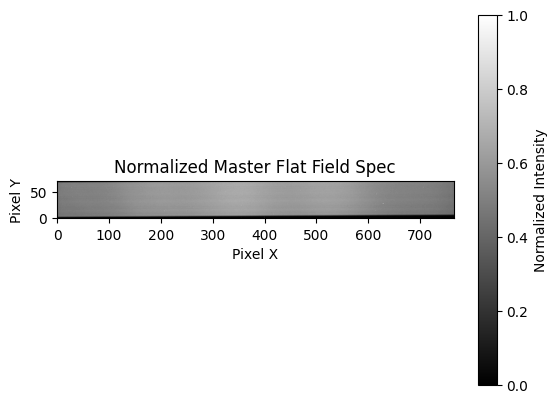

In [15]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Step 1: Read the FITS files
flat_field_data = fits.getdata('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/master_flat_field_spec.FIT')
dark_frame_data = fits.getdata('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/master_dark_frame_spec.FIT')

# Step 2: Subtract the dark frame from the flat field
corrected_flat = flat_field_data - dark_frame_data

# Step 3: Normalize the result
min_val = np.min(corrected_flat)
max_val = np.max(corrected_flat)

# Normalize to the range 0 to 1
normalized_flat = (corrected_flat - min_val) / (max_val - min_val + 1e-10)

# Step 4: Save the normalized data as a FITS file
output_file_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/flat/Normalized_Master_Flat_Field_Spec.FIT'
fits.writeto(output_file_path, normalized_flat, overwrite=True)

# Step 5: Display the normalized image
plt.imshow(normalized_flat, cmap='gray', origin='lower')
plt.colorbar(label='Normalized Intensity')
plt.title('Normalized Master Flat Field Spec')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

#4.3 4.

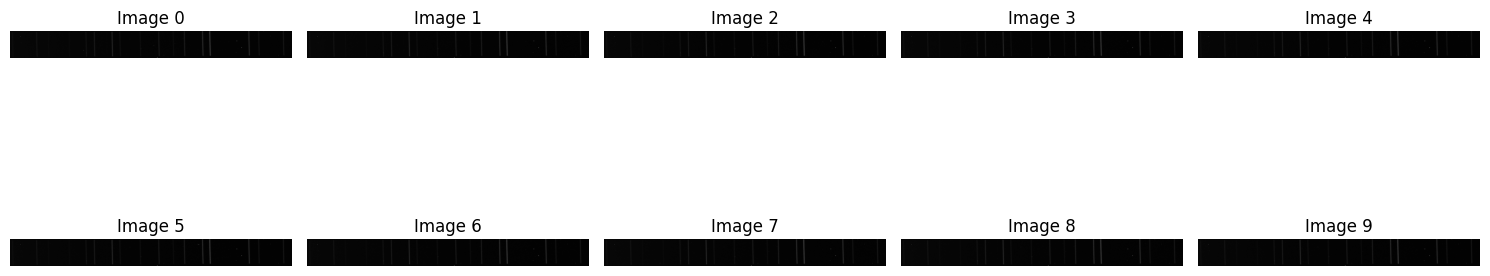

In [16]:
# List of file paths
spec_light = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000000.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000001.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000002.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000003.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000004.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000005.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000006.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000007.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000008.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/spectroscopy_light_15s_.00000009.FIT'
]

# Define the cropping coordinates
x_min, x_max = 0, 765
y_min, y_max = 30, 102

# Create output directory if it doesn't exist
output_dir = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights'
os.makedirs(output_dir, exist_ok=True)

# Create a subplot grid to display all cropped images
n_files = len(spec_light)
n_cols = 5
n_rows = (n_files + n_cols - 1) // n_cols  # Compute the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows), squeeze=False)

# Display and save each cropped image
for idx, path in enumerate(spec_light):
    with fits.open(path) as hdul:
        image_data = hdul[0].data

    # Crop the image
    cropped_image = image_data[y_min:y_max, x_min:x_max]

    # Display the cropped image
    ax = axes[idx // n_cols, idx % n_cols]
    cax = ax.imshow(cropped_image, cmap='gray', origin='lower')
    ax.set_title(f'Image {idx}')
    ax.axis('off')

    # Save the cropped image as a FITS file
    hdu = fits.PrimaryHDU(cropped_image)
    output_fits_file = os.path.join(output_dir, f'cut_light_{idx}.FIT')
    hdu.writeto(output_fits_file, overwrite=True)

# Hide any unused subplots
for j in range(idx + 1, n_rows * n_cols):
    axes[j // n_cols, j % n_cols].axis('off')

plt.tight_layout()
plt.show()

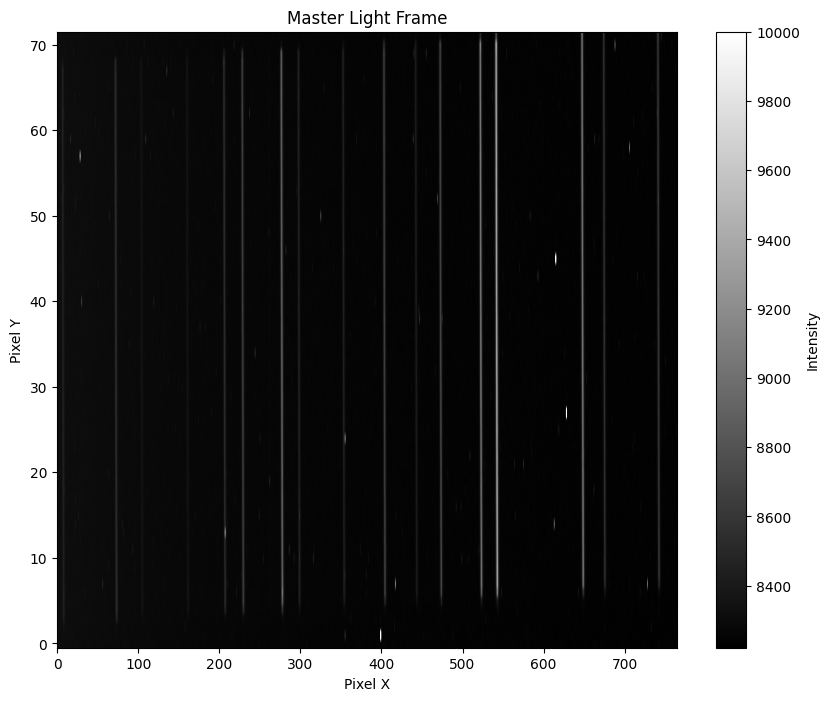

In [17]:
cut_spec_light = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_0.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_1.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_2.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_3.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_4.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_5.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_6.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_7.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_8.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Cut_lights/cut_light_9.FIT'
]

# Initialize a list to hold the data arrays
data_arrays = []


# Read each FIT file and extract the data
for file in cut_spec_light:
    with fits.open(file) as hdul:
        # Assuming the image data is in the first HDU
        data = hdul[0].data
        data_arrays.append(data)

# Stack the data arrays and compute the median
median_light_frame = np.median(np.array(data_arrays), axis=0)

# Create a new FITS file for the Master Light Frame
hdu = fits.PrimaryHDU(median_light_frame)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/master_light_frame_spec.FIT', overwrite=True)

# Display the Master Light Frame
plt.figure(figsize=(10, 8))
plt.imshow(median_light_frame, cmap='gray', origin='lower', aspect='auto', vmax = 10000)
plt.colorbar(label='Intensity')
plt.title('Master Light Frame')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

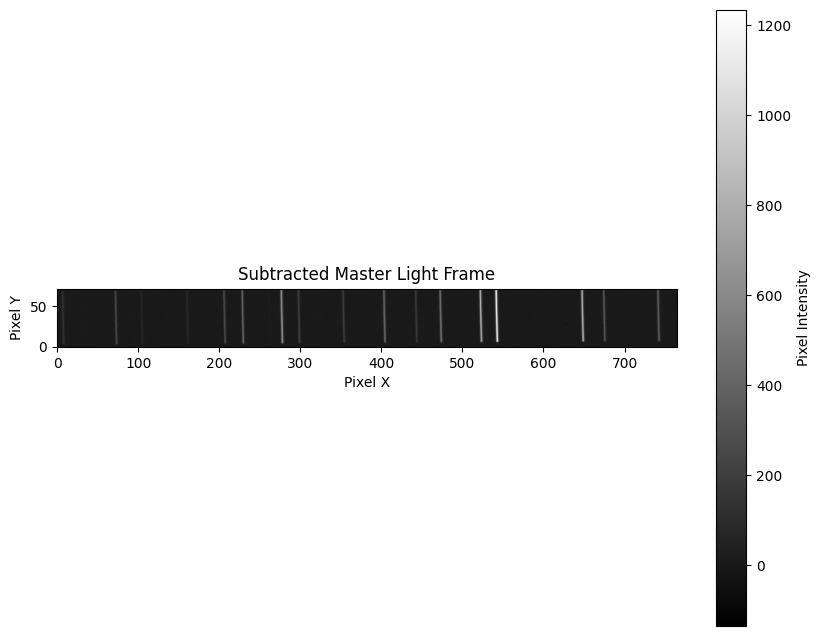

In [18]:
# Import necessary libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Load the Master Light Frame
light_frame_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/master_light_frame_spec.FIT'
dark_frame_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/Dark/master_dark_frame_spec.FIT'

with fits.open(light_frame_path) as light_hdu:
    master_light = light_hdu[0].data  # Assuming data is in the first HDU

with fits.open(dark_frame_path) as dark_hdu:
    master_dark = dark_hdu[0].data  # Assuming data is in the first HDU

# Subtract the Master Dark Frame from the Master Light Frame
corrected_frame = master_light - master_dark

# Save the new corrected frame (optional)
output_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/subtracted_master_light_frame.FIT'
hdu = fits.PrimaryHDU(corrected_frame)
hdu.writeto(output_path, overwrite=True)

# Display the corrected frame
plt.figure(figsize=(10, 8))
plt.imshow(corrected_frame, cmap='gray', origin='lower')
plt.colorbar(label='Pixel Intensity')
plt.title('Subtracted Master Light Frame')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

#4.4 5.

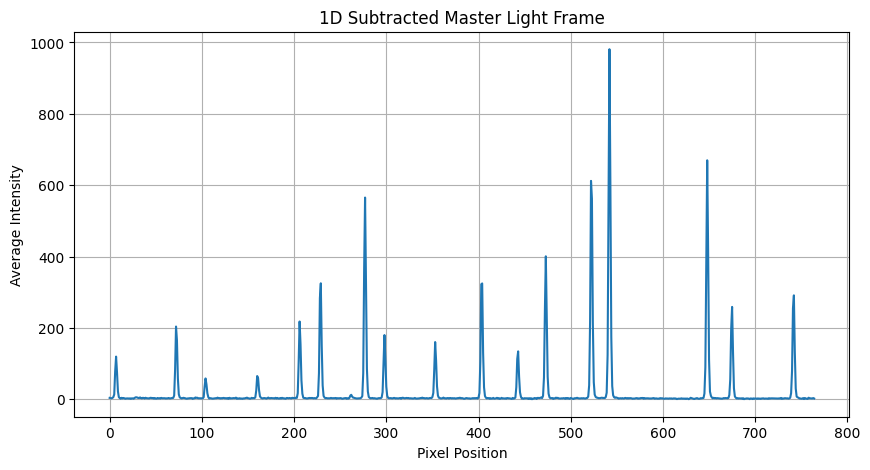

In [19]:
# Load the subtracted Master Light Frame
subtracted_frame_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/subtracted_master_light_frame.FIT'

with fits.open(subtracted_frame_path) as hdu:
    subtracted_frame = hdu[0].data  # Assuming data is in the first HDU

# Average the data along the y-axis to create a 1D array
average_profile = np.mean(subtracted_frame, axis=0)

# Create the 1D plot
plt.figure(figsize=(10, 5))
plt.plot(average_profile)
plt.title('1D Subtracted Master Light Frame')
plt.xlabel('Pixel Position')
plt.ylabel('Average Intensity')
plt.grid()
plt.show()

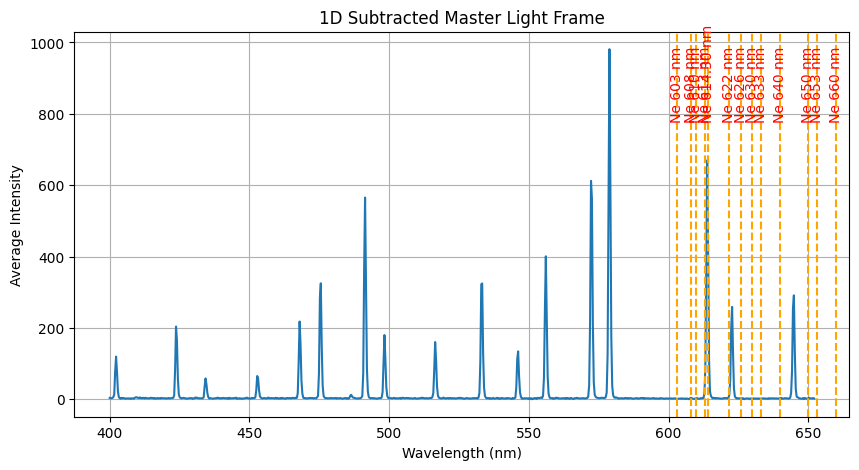

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the subtracted Master Light Frame
subtracted_frame_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/subtracted_master_light_frame.FIT'

with fits.open(subtracted_frame_path) as hdu:
    subtracted_frame = hdu[0].data  # Assuming data is in the first HDU

# Average the data along the y-axis to create a 1D array
average_profile = np.mean(subtracted_frame, axis=0)

# Define the wavelengths of some Neon emission lines (in nm)
neon_lines = {
    "Ne 660 nm": 660,
    "Ne 653 nm": 653,
    "Ne 650 nm": 650,
    "Ne 640 nm": 640,
    "Ne 633 nm": 633,
    "Ne 630 nm": 630,
    "Ne 626 nm": 626,
    "Ne 622 nm": 621.70,
    "Ne 614.30 nm": 614.30,
    "Ne 613 nm": 613,
    "Ne 610 nm": 610,
    "Ne 608 nm": 608,
    "Ne 603 nm": 603,

}

# Define the pixel-to-wavelength conversion parameters
p0 = 0          # Example pixel position corresponding to λ0
lambda_0 = 400  # Example wavelength in nm (you need to adjust this)
delta_lambda = 0.33  # Wavelength change per pixel in nm (you need to adjust this)

# Create an array of pixel positions
pixel_positions = np.arange(len(average_profile))

# Convert pixel positions to wavelengths
wavelengths = lambda_0 + (pixel_positions - p0) * delta_lambda

# Create the 1D plot with wavelength on the x-axis
plt.figure(figsize=(10, 5))
plt.plot(wavelengths, average_profile)
plt.title('1D Subtracted Master Light Frame')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Intensity')
plt.grid()

# Annotate Neon lines
for line, wavelength in neon_lines.items():
    plt.axvline(x=wavelength, color='orange', linestyle='--')  # Vertical line for each emission line
    plt.text(wavelength, max(average_profile) * 0.8, line, rotation=90, color='red', ha='center')

plt.show()

#4.4 6.

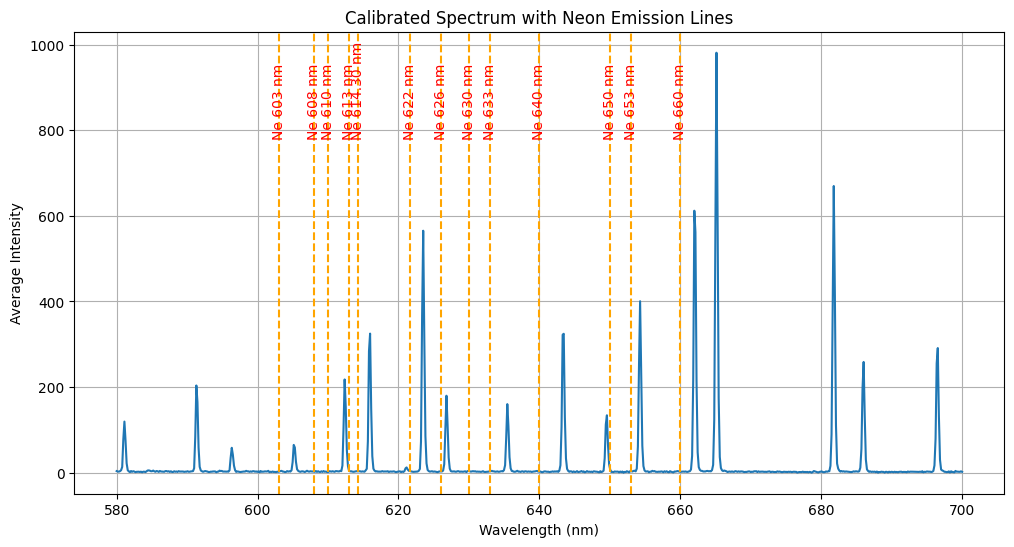

In [21]:
# Import necessary libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Load the subtracted Master Light Frame
subtracted_frame_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/spectroscopy/light/subtracted_master_light_frame.FIT'

with fits.open(subtracted_frame_path) as hdu:
    subtracted_frame = hdu[0].data  # Assuming data is in the first HDU

# Average the data along the y-axis to create a 1D array
average_profile = np.mean(subtracted_frame, axis=0)

# Define the wavelengths of some Neon emission lines (in nm or suitable units)
neon_lines = {
    "Ne 660 nm": 660,
    "Ne 653 nm": 653,
    "Ne 650 nm": 650,
    "Ne 640 nm": 640,
    "Ne 633 nm": 633,
    "Ne 630 nm": 630,
    "Ne 626 nm": 626,
    "Ne 622 nm": 621.70,
    "Ne 614.30 nm": 614.30,
    "Ne 613 nm": 613,
    "Ne 610 nm": 610,
    "Ne 608 nm": 608,
    "Ne 603 nm": 603,

}

# Generate an x-axis for the plot (adjust based on your data)
x = np.linspace(580, 700, len(average_profile))  # Assuming wavelength range from 580 to 650 nm

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x, average_profile)
plt.title('Calibrated Spectrum with Neon Emission Lines')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Average Intensity')
plt.grid()

# Annotate Neon lines
for line, wavelength in neon_lines.items():
    plt.axvline(x=wavelength, color='orange', linestyle='--')  # Vertical line for each emission line
    plt.text(wavelength, max(average_profile) * 0.8, line, rotation=90, color='red', ha='center')

plt.show()

#4.4 7.

#4.6. Make a pretty image

##Halpha Image

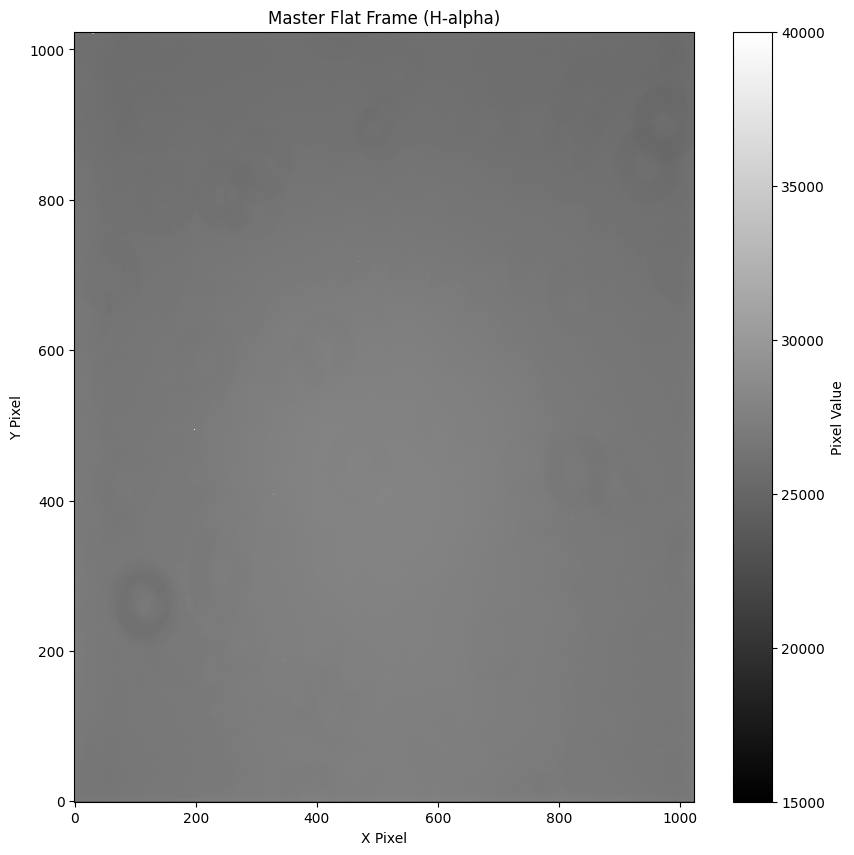

In [23]:
# List of H-alpha flat FITS files
Halpha_flats_4s = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000000.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000001.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000002.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000003.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000004.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000005.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000006.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000007.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000008.FLAT.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Andromeda_Halpha_Flat_4s_.00000009.FLAT.FIT'
]

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
for filename in Halpha_flats_4s:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_flat = np.median(np.array(data_list), axis=0)

# Save the master flat frame as a FITS file
#hdu_flat = fits.PrimaryHDU(master_flat)
#hdu_flat.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Flats_Halpha/Master_Halpha_Flat.FIT', overwrite=True)

# Display the master flat frame
plt.figure(figsize=(10, 10))
plt.imshow(master_flat, cmap='gray', origin='lower', aspect='auto', vmax= 40000, vmin= 15000)
plt.colorbar(label='Pixel Value')
plt.title('Master Flat Frame (H-alpha)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

In [ ]:
Halpha_darks_4s= [

]

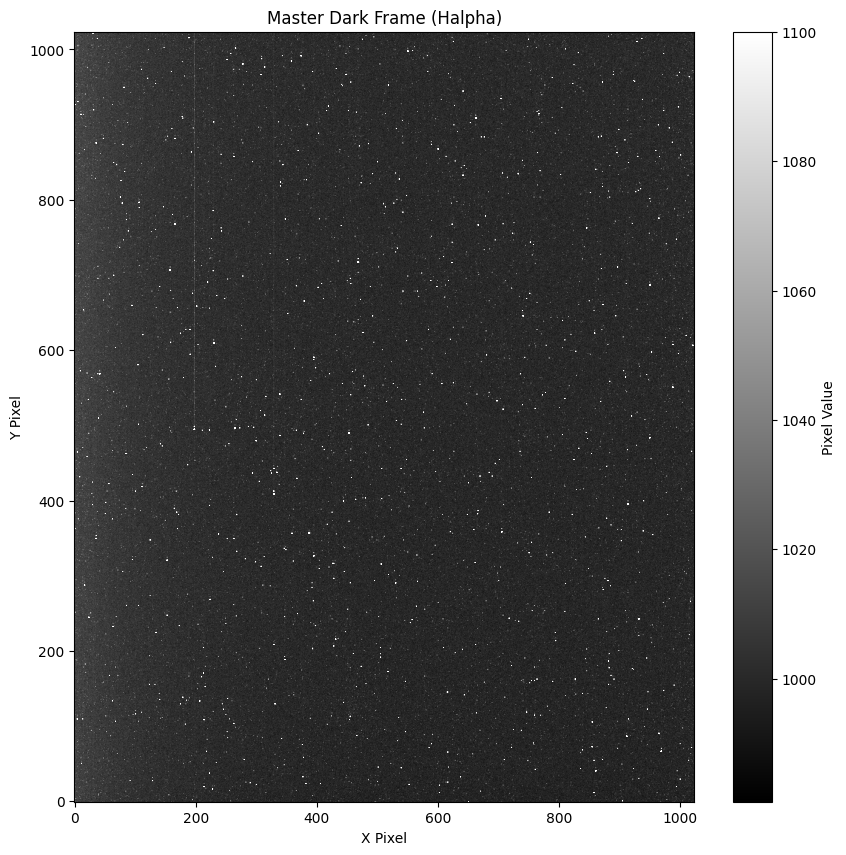

In [24]:
# List of FITS files
Halpha_darks_5s= [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Halpha_Dark_5s_.00000000.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Halpha_Dark_5s_.00000001.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Halpha_Dark_5s_.00000002.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Halpha_Dark_5s_.00000003.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Halpha_Dark_5s_.00000004.DARK.FIT'
]

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
for filename in Halpha_darks_5s:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_dark = np.median(np.array(data_list), axis=0)

# Save the master dark frame as a FITS file
hdu = fits.PrimaryHDU(master_dark)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Master_Dark_Frame_Halpha.FIT', overwrite=True)

# Display the master dark frame
plt.figure(figsize=(10, 10))
plt.imshow(master_dark, cmap='gray', origin='lower', aspect='auto', vmax= 1100)
plt.colorbar(label='Pixel Value')
plt.title('Master Dark Frame (Halpha)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

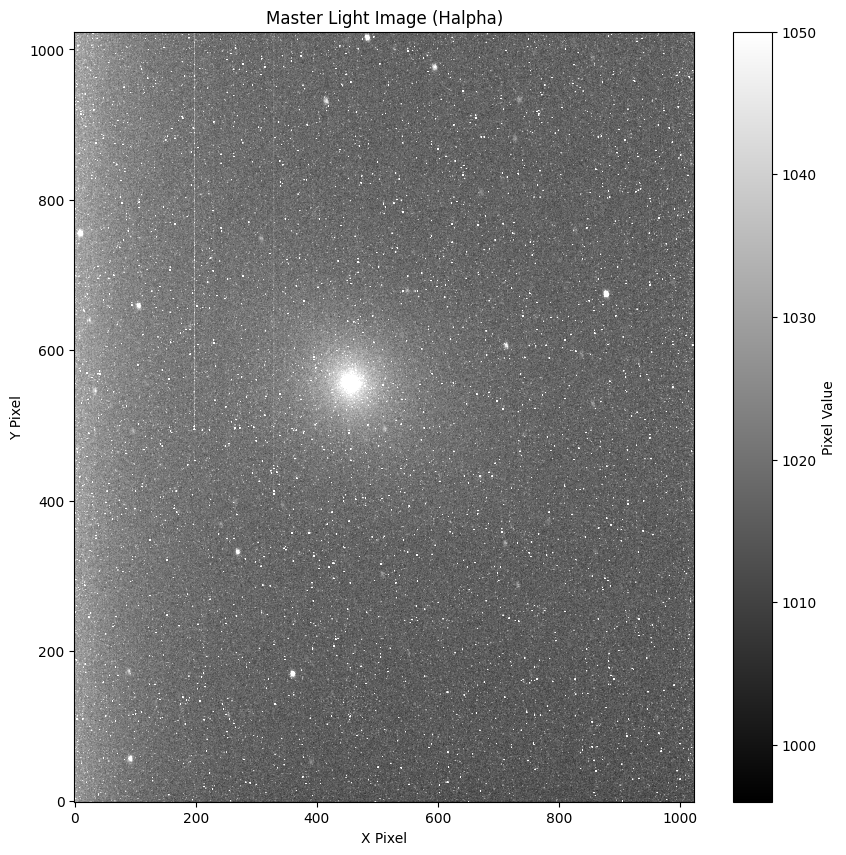

In [25]:
# List of FITS files for light
Halpha_lights_5s= [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Halpha_Light_5s_.00000000.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Halpha_Light_5s_.00000001.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Halpha_Light_5s_.00000002.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Halpha_Light_5s_.00000003.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Halpha_Light_5s_.00000004.FIT'
]

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
for filename in Halpha_lights_5s:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_light = np.median(np.array(data_list), axis=0)

# Save the master light frame as a FITS file
hdu = fits.PrimaryHDU(master_light)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Master_Light_Image_Halpha.FIT', overwrite=True)

# Display the master light frame
plt.figure(figsize=(10, 10))
plt.imshow(master_light, cmap='gray', origin='lower', aspect='auto', vmax= 1050)
plt.colorbar(label='Pixel Value')
plt.title('Master Light Image (Halpha)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

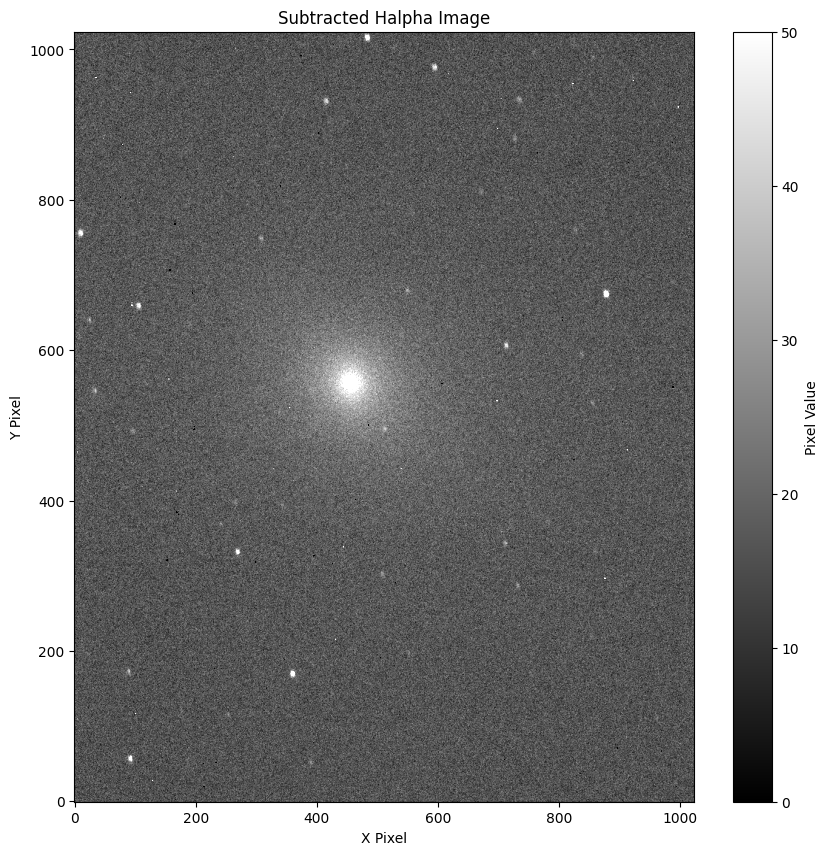

In [26]:
# Define paths for the Master Light and Master Dark frames
master_light_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Master_Light_Image_Halpha.FIT'
master_dark_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Master_Dark_Frame_Halpha.FIT'

# Read the Master Light frame
with fits.open(master_light_path) as hdul_light:
    master_light = hdul_light[0].data

# Read the Master Dark frame
with fits.open(master_dark_path) as hdul_dark:
    master_dark = hdul_dark[0].data

# Subtract the Master Dark from the Master Light
subtracted_image = master_light - master_dark

# Save the subtracted image as a new FITS file
hdu_subtracted = fits.PrimaryHDU(subtracted_image)
hdu_subtracted.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Subtracted_Image_Halpha.FIT', overwrite=True)

# Display the subtracted image
plt.figure(figsize=(10, 10))
plt.imshow(subtracted_image, cmap='gray', origin='lower', aspect='auto', vmax= 50, vmin= 0)
plt.colorbar(label='Pixel Value')
plt.title('Subtracted Halpha Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

##Visible Image

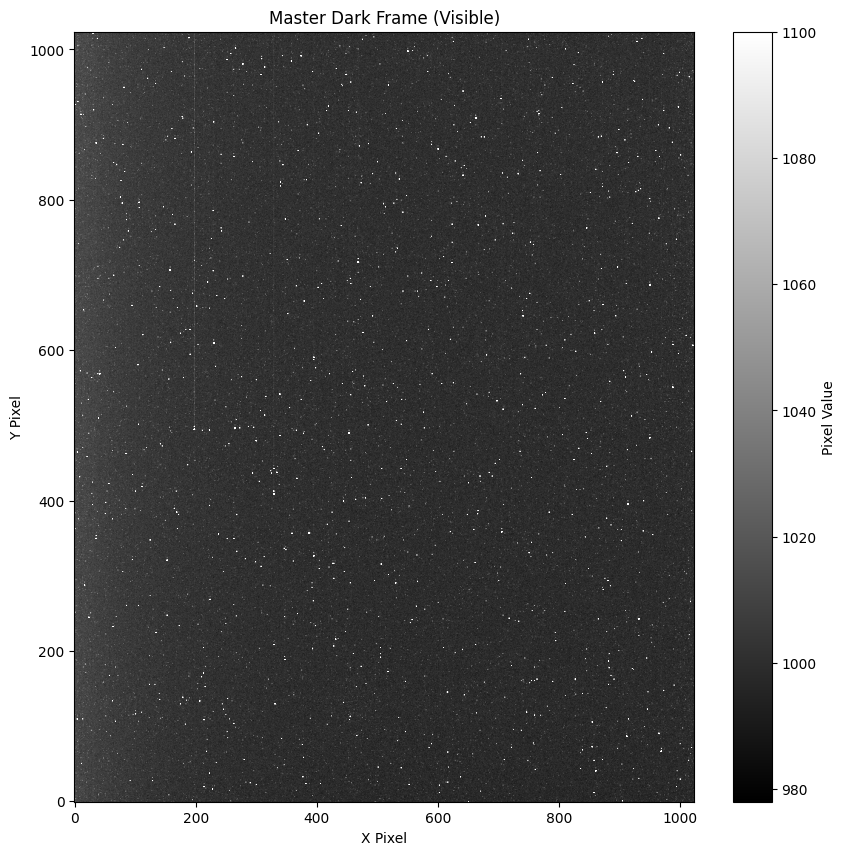

In [27]:
# List of FITS files
visible_darks = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000000.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000001.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000002.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000003.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000004.DARK.FIT'
]

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
for filename in visible_darks:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_dark = np.median(np.array(data_list), axis=0)

# Save the master dark frame as a FITS file
hdu = fits.PrimaryHDU(master_dark)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Master_Dark_Frame_Visible.FIT', overwrite=True)

# Display the master dark frame
plt.figure(figsize=(10, 10))
plt.imshow(master_dark, cmap='gray', origin='lower', aspect='auto', vmax= 1100)
plt.colorbar(label='Pixel Value')
plt.title('Master Dark Frame (Visible)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

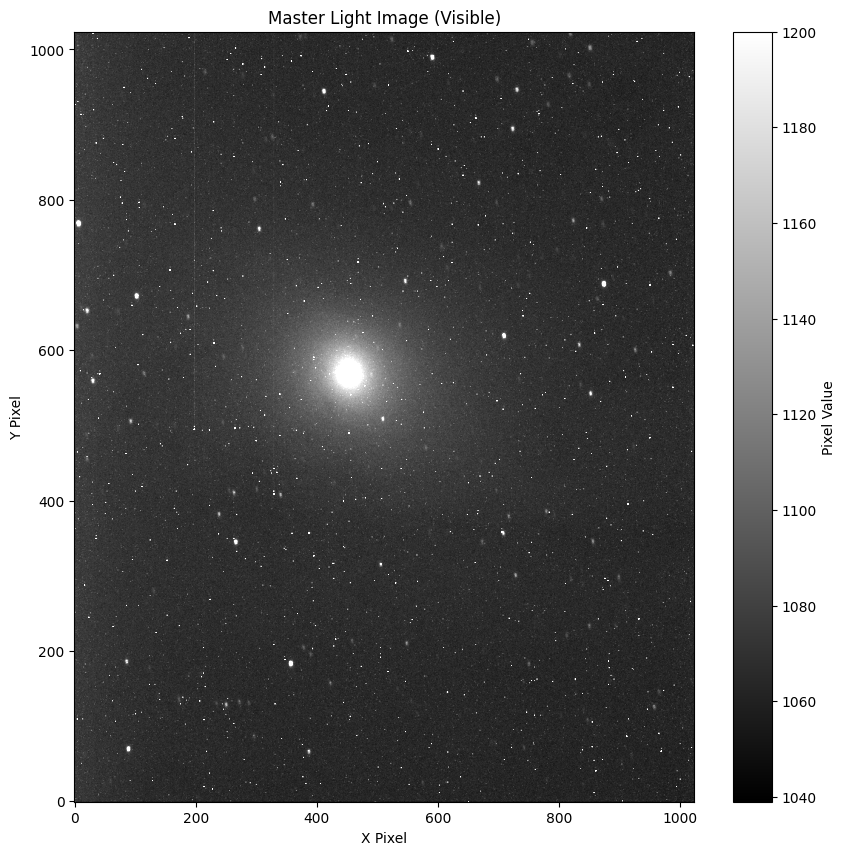

In [28]:
# List of FITS files for light
visible_light = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Visible_Light_5s_.00000000.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Visible_Light_5s_.00000001.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Visible_Light_5s_.00000002.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Visible_Light_5s_.00000003.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Andromeda_Visible_Light_5s_.00000004.FIT'
]

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
for filename in visible_light:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_light = np.median(np.array(data_list), axis=0)

# Save the master light frame as a FITS file
hdu = fits.PrimaryHDU(master_light)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Master_Light_Image_Visible.FIT', overwrite=True)

# Display the master light frame
plt.figure(figsize=(10, 10))
plt.imshow(master_light, cmap='gray', origin='lower', aspect='auto', vmax= 1200)
plt.colorbar(label='Pixel Value')
plt.title('Master Light Image (Visible)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

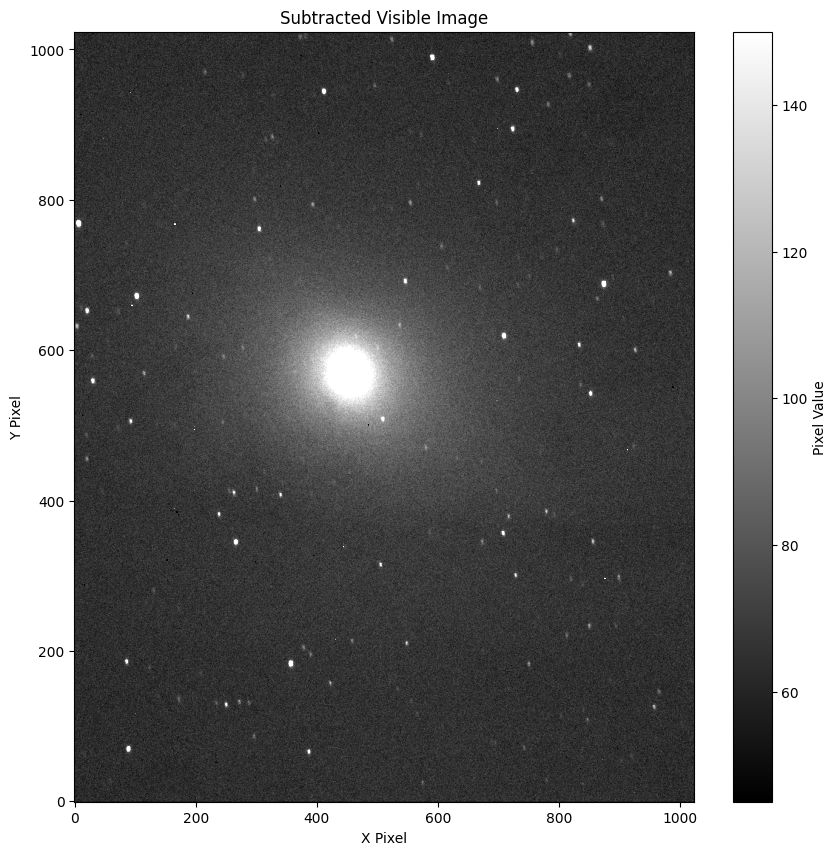

In [29]:
# Define paths for the Master Light and Master Dark frames
master_light_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Light/Master_Light_Image_Visible.FIT'
master_dark_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Master_Dark_Frame_Visible.FIT'

# Read the Master Light frame
with fits.open(master_light_path) as hdul_light:
    master_light = hdul_light[0].data

# Read the Master Dark frame
with fits.open(master_dark_path) as hdul_dark:
    master_dark = hdul_dark[0].data

# Subtract the Master Dark from the Master Light
subtracted_image = master_light - master_dark

# Save the subtracted image as a new FITS file
hdu_subtracted = fits.PrimaryHDU(subtracted_image)
hdu_subtracted.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Subtracted_Image_Visible.FIT', overwrite=True)

# Display the subtracted image
plt.figure(figsize=(10, 10))
plt.imshow(subtracted_image, cmap='gray', origin='lower', aspect='auto', vmax= 150, vmin= 45)
plt.colorbar(label='Pixel Value')
plt.title('Subtracted Visible Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

Using the Normalized Flat Field from earlier:

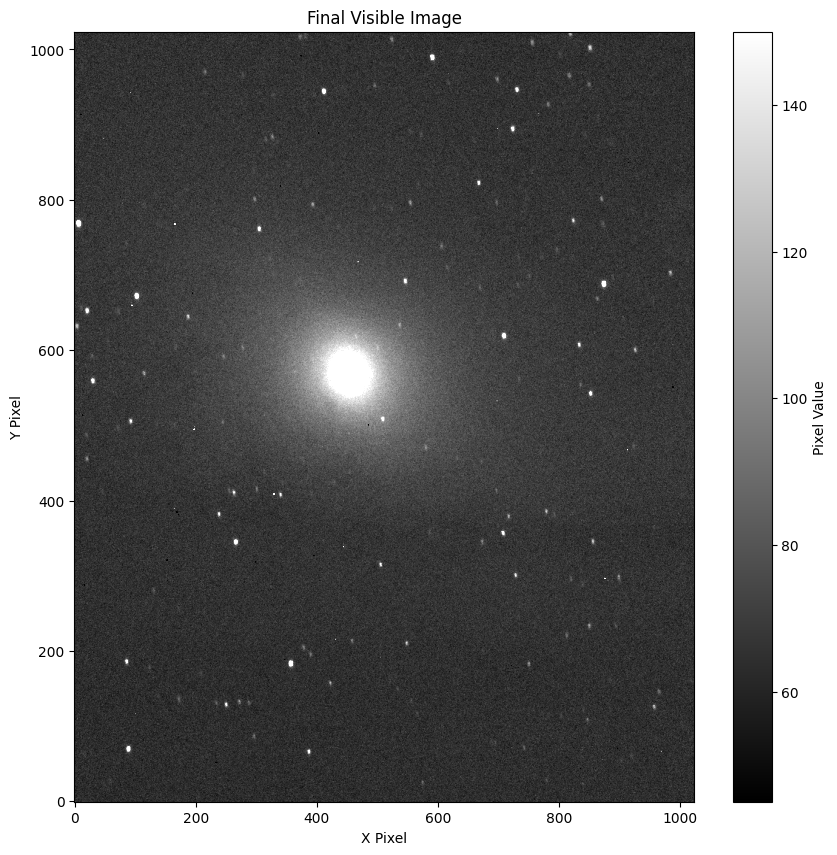

In [30]:
# Define paths for the Subtracted Image and Normalized Master Flat
subtracted_image_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Subtracted_Image_Visible.FIT'
normalized_master_flat_path = '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Photometry/Flats/Normalized_Master_Flat-Field.FIT'

# Read the Subtracted Image
with fits.open(subtracted_image_path) as hdul_subtracted:
    subtracted_image = hdul_subtracted[0].data

# Read the Normalized Master Flat
with fits.open(normalized_master_flat_path) as hdul_flat:
    normalized_master_flat = hdul_flat[0].data

# Check for division by zero and create a mask if necessary
with np.errstate(divide='ignore', invalid='ignore'):
    divided_image = np.divide(subtracted_image, normalized_master_flat)

# Set any resulting NaNs or infinities to 0
divided_image[np.isnan(divided_image)] = 0
divided_image[np.isinf(divided_image)] = 0

# Save the divided image as a new FITS file
hdu_divided = fits.PrimaryHDU(divided_image)
hdu_divided.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Final_Visible_Image.FIT', overwrite=True)

# Display the divided image
plt.figure(figsize=(10, 10))
plt.imshow(divided_image, cmap='gray', origin='lower', aspect='auto', vmax= 150, vmin= 45)
plt.colorbar(label='Pixel Value')
plt.title('Final Visible Image')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

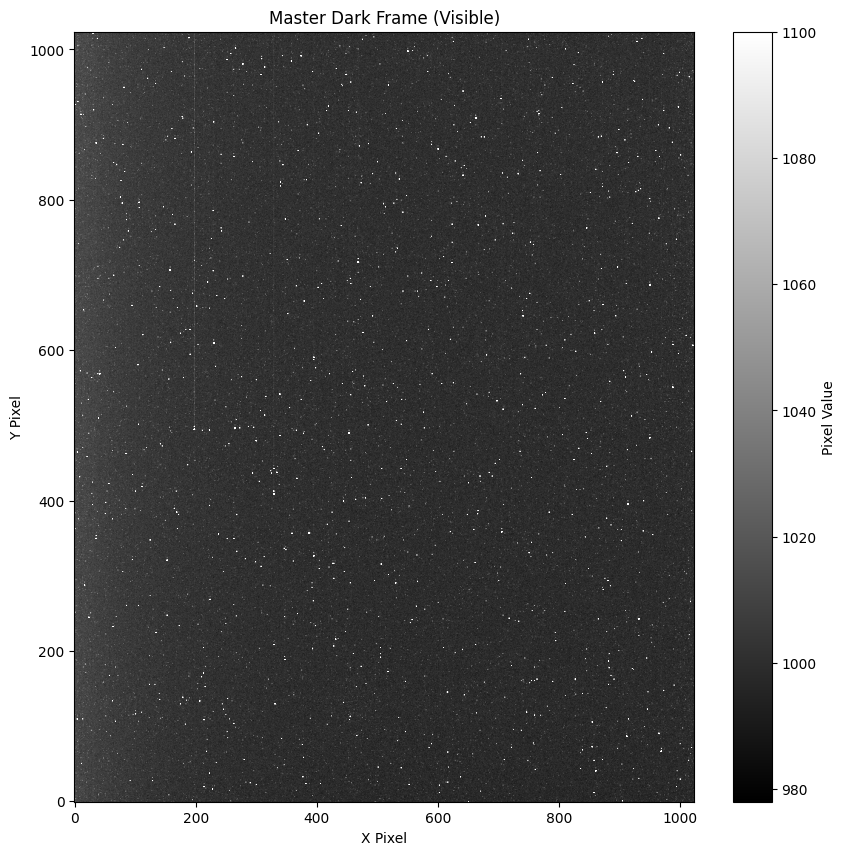

In [31]:
# List of FITS files
visible_darks = [
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000000.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000001.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000002.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000003.DARK.FIT',
    '/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.00000004.DARK.FIT'
]

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
for filename in visible_darks:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_dark = np.median(np.array(data_list), axis=0)

# Save the master dark frame as a FITS file
hdu = fits.PrimaryHDU(master_dark)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Master_Dark_Frame_Visible.FIT', overwrite=True)

# Display the master dark frame
plt.figure(figsize=(10, 10))
plt.imshow(master_dark, cmap='gray', origin='lower', aspect='auto', vmax= 1100)
plt.colorbar(label='Pixel Value')
plt.title('Master Dark Frame (Visible)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

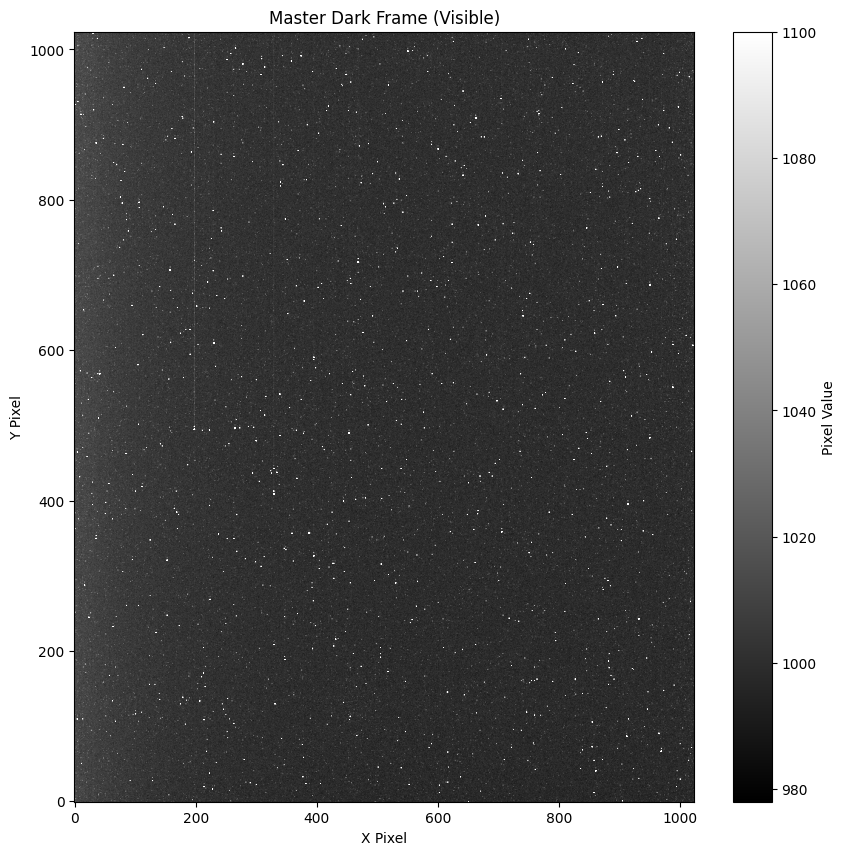

In [32]:
# List of FITS files
visible_darks = []
for i in range(5):
    frame = f'/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Andromeda_Visible_Dark_5s_.0000000{i}.DARK.FIT'
    # Append the filename to the list, not the image data
    visible_darks.append(frame)

# Initialize a list to store image data
data_list = []

# Read each FITS file and append the data to the list
# iterate over the list of filenames in visible_darks, not the values in the NumPy array.
for filename in visible_darks:
    with fits.open(filename) as hdul:
        data = hdul[0].data  # Assuming the image data is in the first HDU
        data_list.append(data)

# Stack the data and calculate the median across the 0th axis
master_dark = np.median(np.array(data_list), axis=0)

# Save the master dark frame as a FITS file
hdu = fits.PrimaryHDU(master_dark)
hdu.writeto('/content/drive/MyDrive/AST 443 Group 5/Lab 1 CCD/Group 5 data lab1/Picture of Object/Andromena/Dark/Master_Dark_Frame_Visible.FIT', overwrite=True)

# Display the master dark frame
plt.figure(figsize=(10, 10))
plt.imshow(master_dark, cmap='gray', origin='lower', aspect='auto', vmax= 1100)
plt.colorbar(label='Pixel Value')
plt.title('Master Dark Frame (Visible)')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()